('FSC-H', 'FSC-A', 'SSC-H', 'SSC-A', 'FL1-H', 'FL1-A', 'FSC-Width', 'Time')


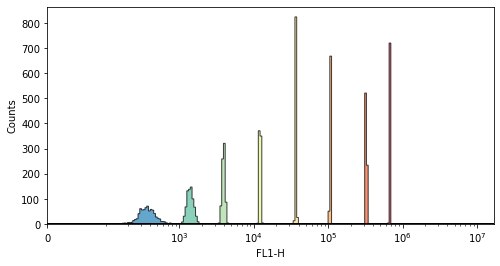

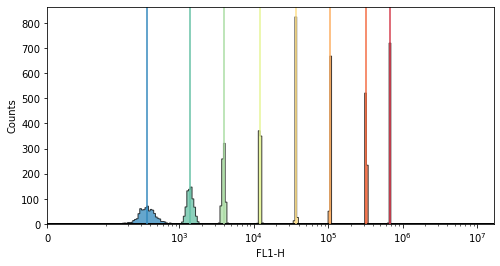

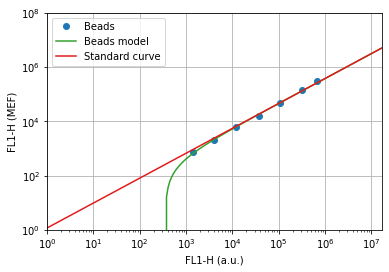

In [2]:
#importing beads data for MEFL calibration

import FlowCal
import matplotlib.pyplot as plt
import numpy as np
#import beads file
#set beads file here
file_beads = 'C:/Users/rbutc/Desktop/Rice/Research/Summer2022/Flow/Exp_20220531_1/01-Well-H7.fcs'
b = FlowCal.io.FCSData(file_beads)
#find channel names
print(b.channels)
#
b = FlowCal.transform.to_rfi(b)
density_gate_output = FlowCal.gate.density2d(b,channels=['FSC-A', 'SSC-A'],gate_fraction=0.3,full_output=True)
b_g = density_gate_output.gated_data

#Place beads calibration value
mefl_values = np.array([0, 771, 2106, 6262, 15183, 45292, 136258, 291042])
#beads calibration for FL1-H (FITC-height)
to_mef = FlowCal.mef.get_transform_fxn(b_g,mef_values=mefl_values,mef_channels='FL1-H',plot=True)



In [5]:
# import  sample file
list = np.arange(1,7)

#USe files from 7/11, 7/13, and 7/14
dir = 'C:/Users/rbutc/Desktop/Rice/Research/Summer2022/Flow/20220714/01-Well-'
#7/11
rows = "ABCDEF"
#7/13
#rows = "ABCEFG"
#7/14
#rows = "ABDEFG"
array = np.empty(6, dtype = float)
for j in rows:
    for i in range(1,7):
        samp1 = dir+j+str(i+0)+'.fcs'
        #print(samp1)
        #calibrating sample to ME
        s1 = FlowCal.io.FCSData(samp1)
        s1 = FlowCal.transform.to_rfi(s1)
        # Gate
        s1_g = FlowCal.gate.high_low(s1, channels=['FSC-A', 'SSC-A'])
        s1_g = FlowCal.gate.density2d(s1_g,channels=['FSC-A', 'SSC-A'],gate_fraction=0.5)
    
        # Plot Calibrated FL1
        #FlowCal.plot.hist1d(s1_g, channel='FL5-H')
        #plt.xlim([-1000,10000000])
        #plt.show()
    
        #print mean
        array[i-1] = round(FlowCal.stats.median(s1_g,'FL1-H'),1)
        #stdev = FlowCal.stats.std(s1_g,'FL5-H')
    print(*array,sep=' ')

558.1 540.8 517.4 520.7 524.4 507.0
517.8 516.8 505.4 509.7 510.0 499.6


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/rbutc/Desktop/Rice/Research/Summer2022/Flow/20220714/01-Well-C1.fcs'